In [33]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs import project_config
from configs.RecursiveVPSDE.LSTM_fBiPot.recursive_LSTM_PostMeanScore_fBiPot_T256_H05_tl_110data import get_config
from configs.RecursiveVPSDE.LSTM_fQuadSinHF.recursive_LSTM_PostMeanScore_fQuadSinHF_T256_H05_tl_110data import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
num_paths = 10952

In [35]:
def get_drift_files(config, ts_type):
    ts_type = f"{ts_type}"
    print(ts_type)
    try:
        include =  (f"{config.deltaT:.3e}dT_{config.quartic_coeff}a_{config.quad_coeff}b_{config.const}c").replace(
            ".", "")
    except AttributeError as e:
        include = (f"{config.deltaT:.3e}dT_{config.quad_coeff}a_{config.sin_coeff}b_{config.sin_space_scale}c").replace(
        ".", "")
    root_dir = project_config.ROOT_DIR + f"experiments/results/"
    true_files = []
    local_files = []
    for file in os.listdir(root_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file and "DriftTrack" in file and "global" not in file:
            l = True#len(np.load(file).shape) == 4
            if "true" in file and l:
                true_files.append(root_dir+file)
            elif "local" in file and l:
                local_files.append(root_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[3][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws

In [36]:
config = get_config()
ts_type = "QuadSinHF" if "QuadSinHF" in config.data_path else "BiPot"
true_files, local_files, bws = get_drift_files(config=config, ts_type=ts_type)
true_files

QuadSinHF


['/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_fQuadSinHF_DriftTrack_00001bw_10952NPaths_00t0_3906e-03dT_05a_004b_250c_256NumDPS_true_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_fQuadSinHF_DriftTrack_0000126bw_10952NPaths_00t0_3906e-03dT_05a_004b_250c_256NumDPS_true_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_fQuadSinHF_DriftTrack_0000159bw_10952NPaths_00t0_3906e-03dT_05a_004b_250c_256NumDPS_true_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_fQuadSinHF_DriftTrack_0000201bw_10952NPaths_00t0_3906e-03dT_05a_004b_250c_256NumDPS_true_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_fQuadSinHF_DriftTrack_0000254bw_10952NPaths_00t0_3906e-03dT_05a_004b_250c_256NumDPS_true_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/re

0.04913644184591827 (0.04913644184591828, 0.04913644184591828) inf


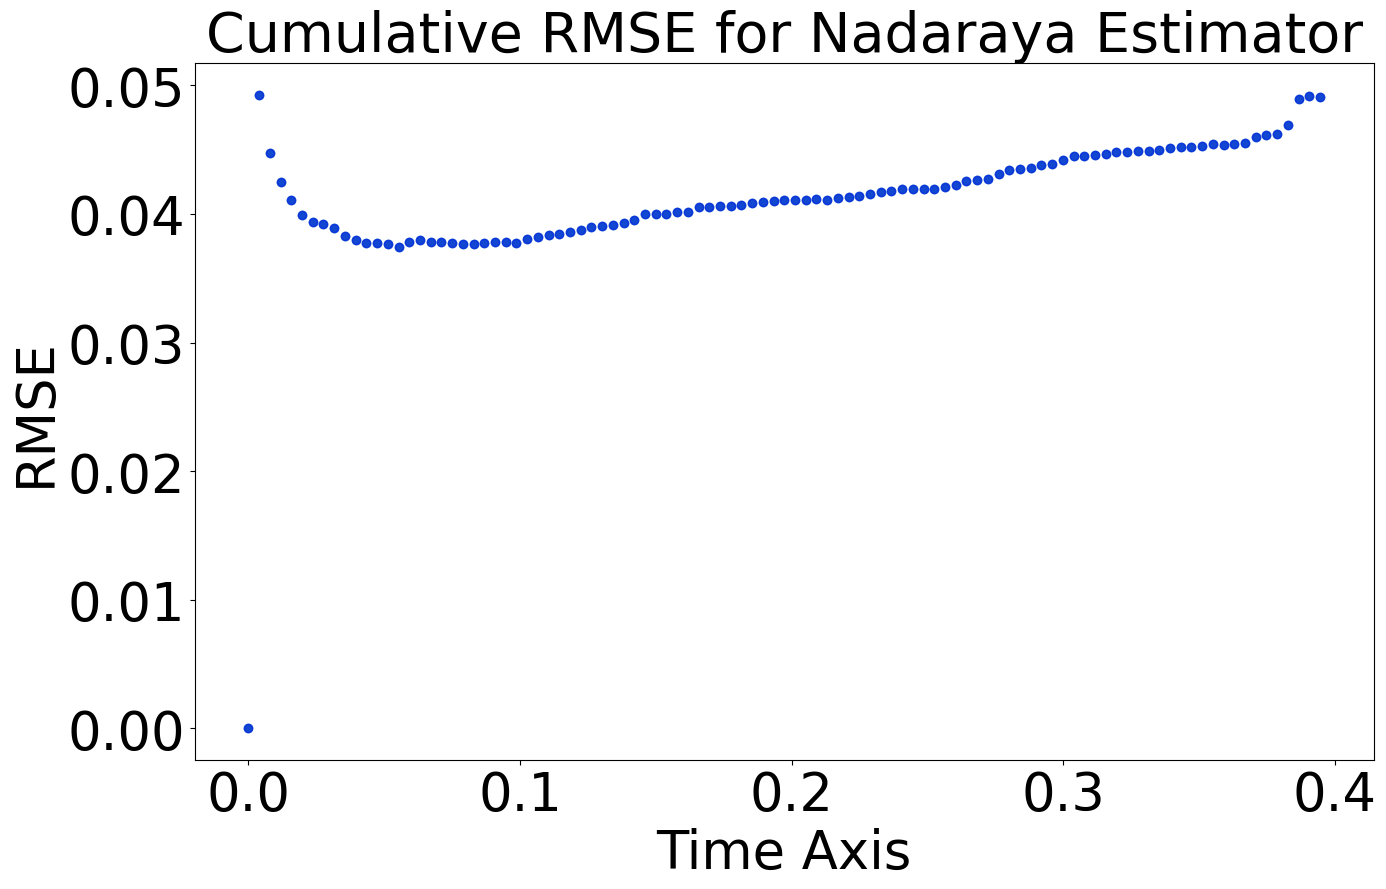

Final time cumulative RMSE local-time error 0.04913644184591827 with IQR (0.04913644184591828, 0.04913644184591828) at bw 1e-05

0.04339740584061847 (0.043397405840618485, 0.043397405840618485) 0.04913644184591827


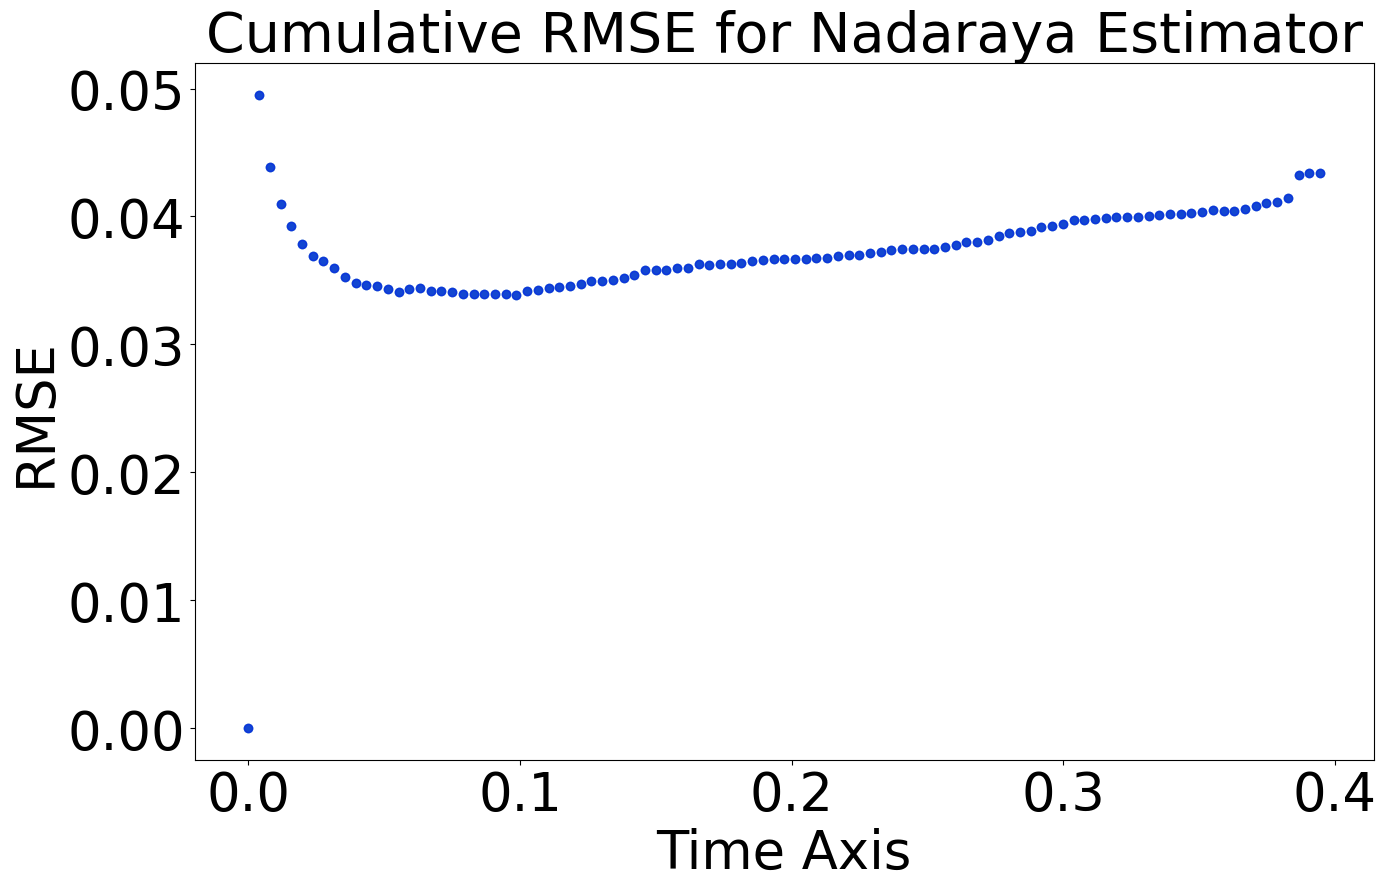

Final time cumulative RMSE local-time error 0.04339740584061847 with IQR (0.043397405840618485, 0.043397405840618485) at bw 1.26e-05

0.038276350956276725 (0.03827635095627674, 0.03827635095627674) 0.04339740584061847


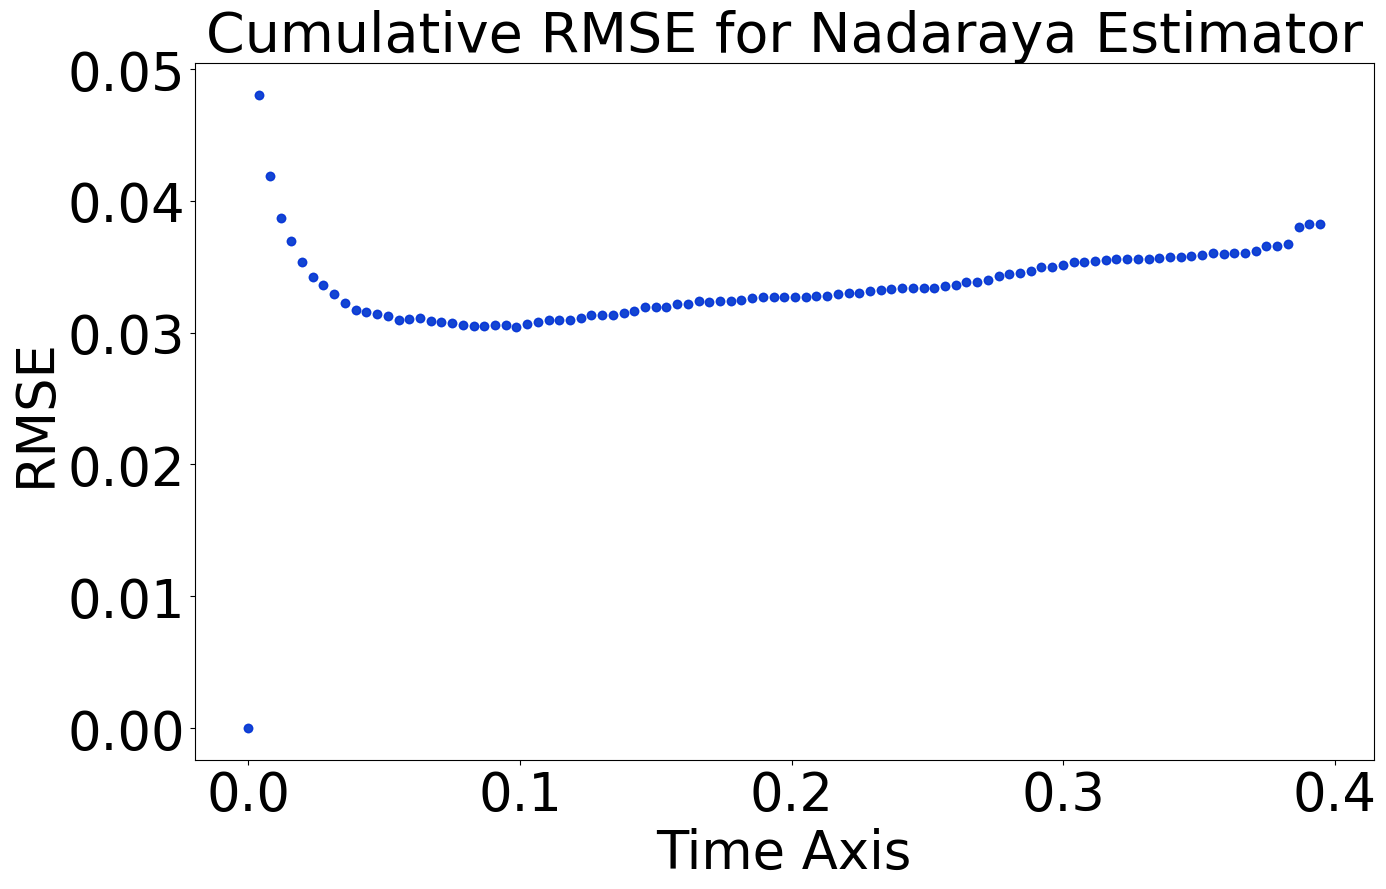

Final time cumulative RMSE local-time error 0.038276350956276725 with IQR (0.03827635095627674, 0.03827635095627674) at bw 1.59e-05

0.03375341881216653 (0.03375341881216653, 0.03375341881216653) 0.038276350956276725


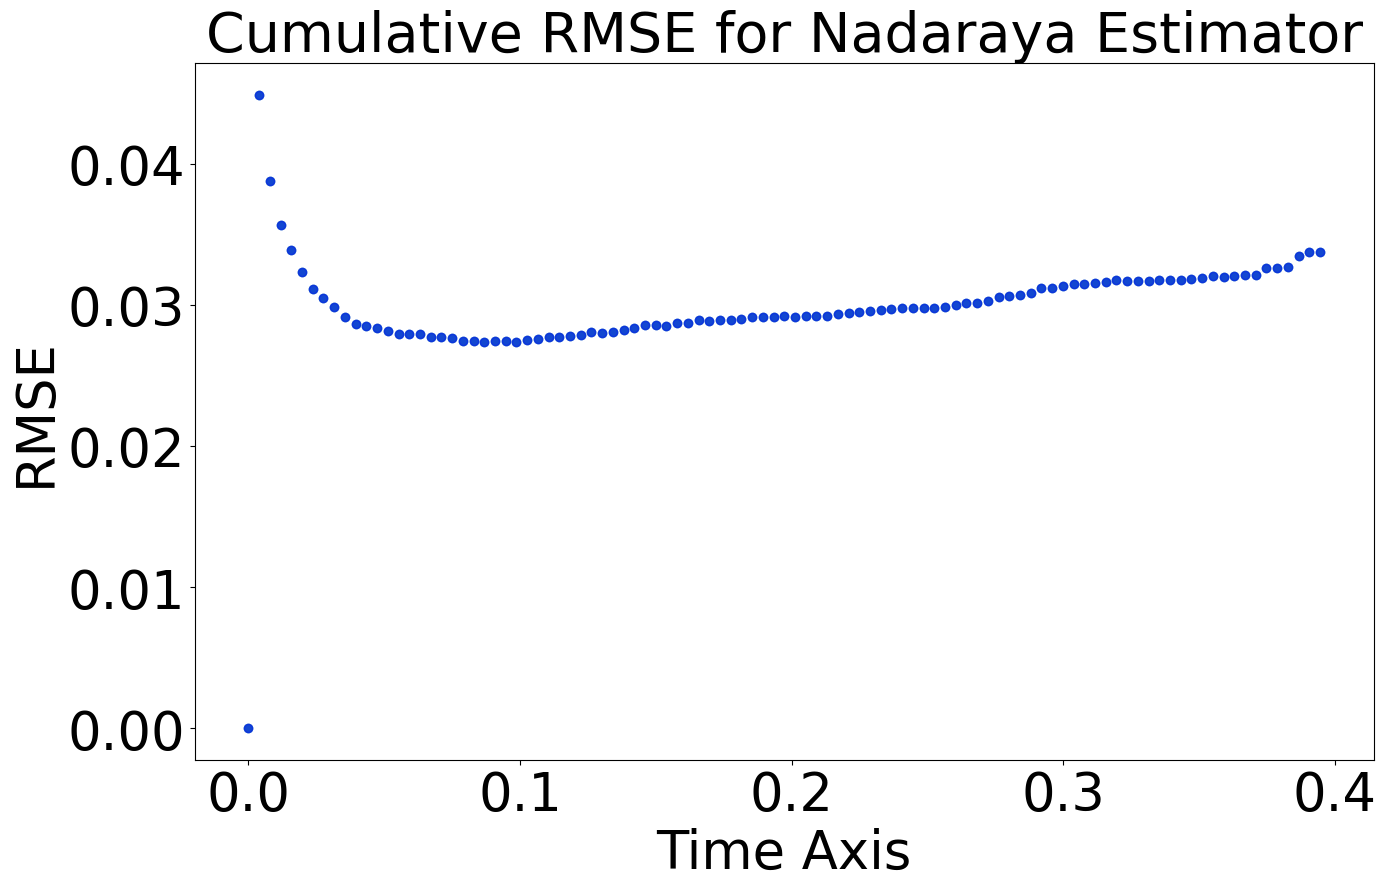

Final time cumulative RMSE local-time error 0.03375341881216653 with IQR (0.03375341881216653, 0.03375341881216653) at bw 2.01e-05

0.029837182119633453 (0.029837182119633456, 0.029837182119633456) 0.03375341881216653


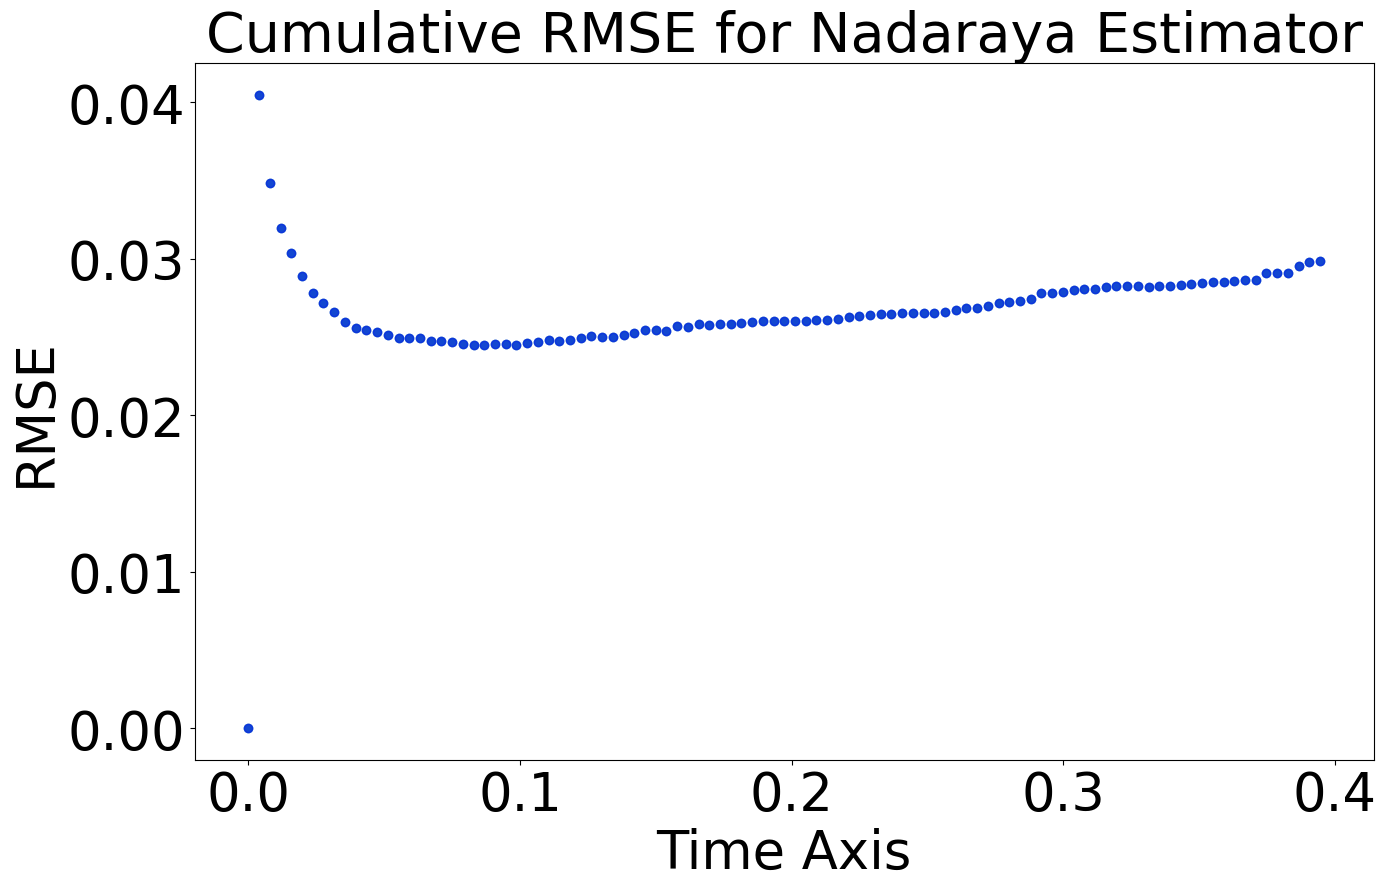

Final time cumulative RMSE local-time error 0.029837182119633453 with IQR (0.029837182119633456, 0.029837182119633456) at bw 2.54e-05

0.026501382219516152 (0.02650138221951615, 0.02650138221951615) 0.029837182119633453


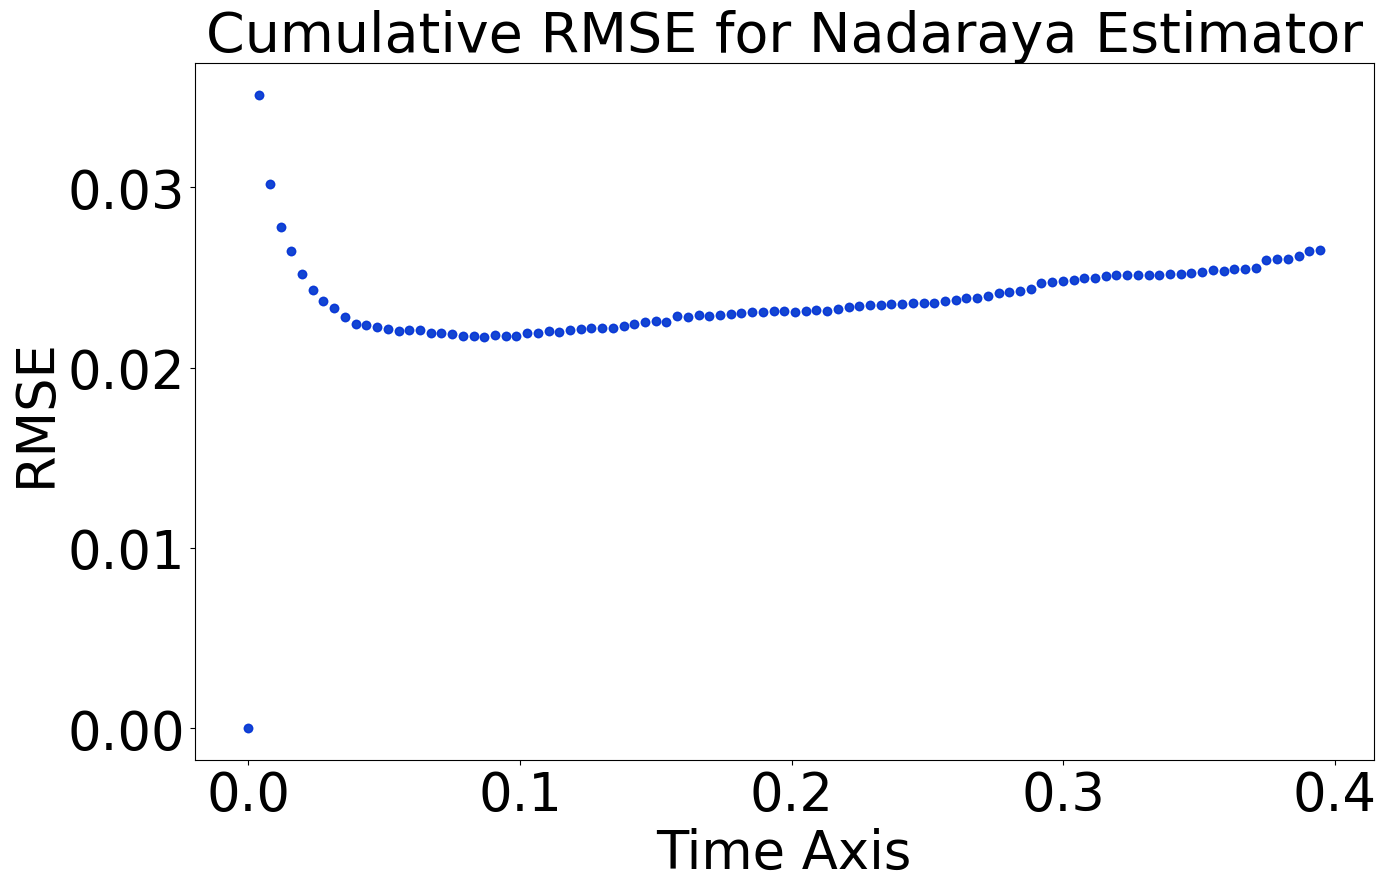

Final time cumulative RMSE local-time error 0.026501382219516152 with IQR (0.02650138221951615, 0.02650138221951615) at bw 3.21e-05

0.02359212963556932 (0.02359212963556931, 0.02359212963556931) 0.026501382219516152


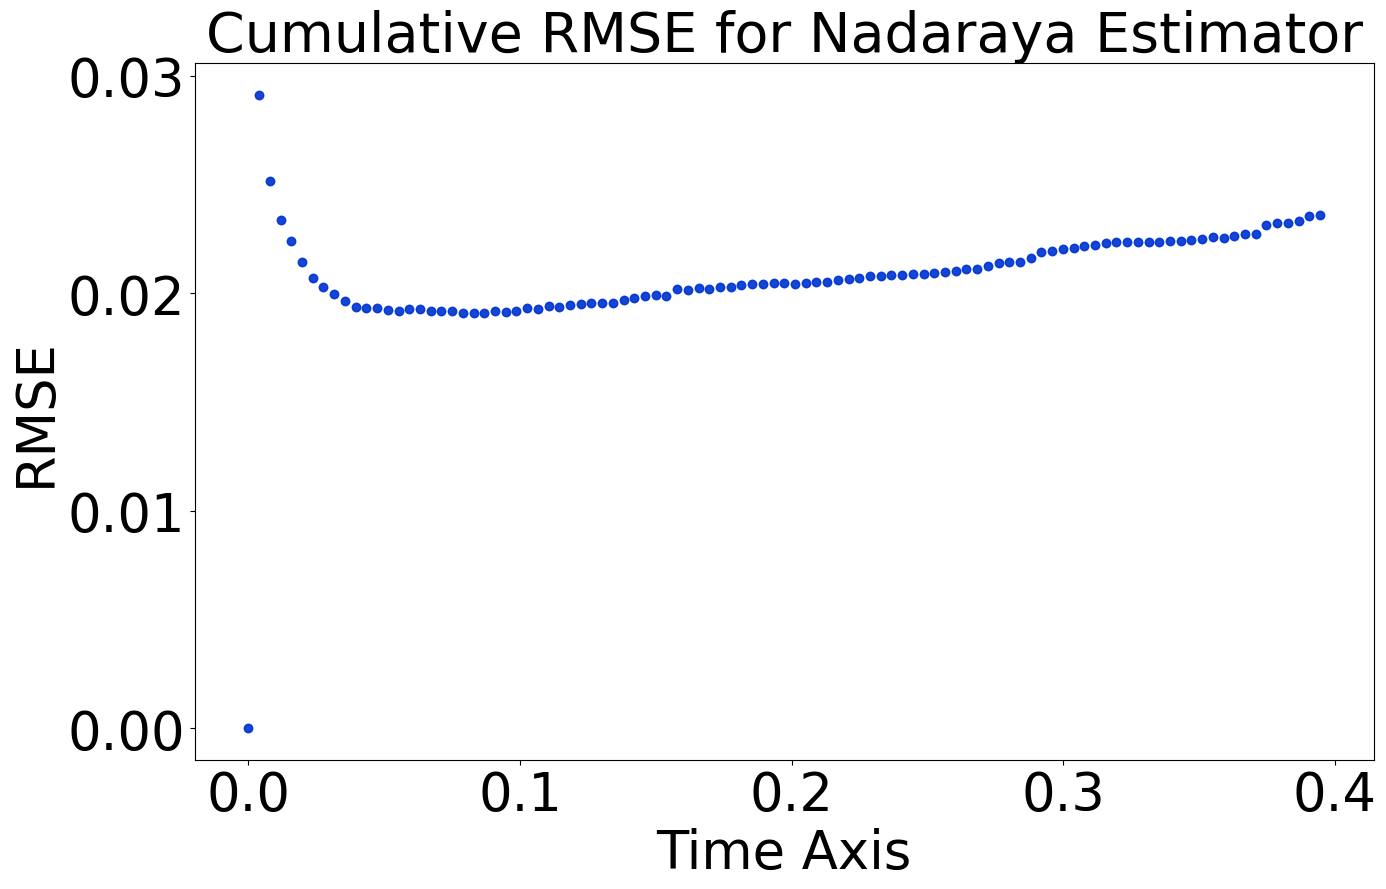

Final time cumulative RMSE local-time error 0.02359212963556932 with IQR (0.02359212963556931, 0.02359212963556931) at bw 4.05e-05

0.02097191204618581 (0.020971912046185804, 0.020971912046185804) 0.02359212963556932


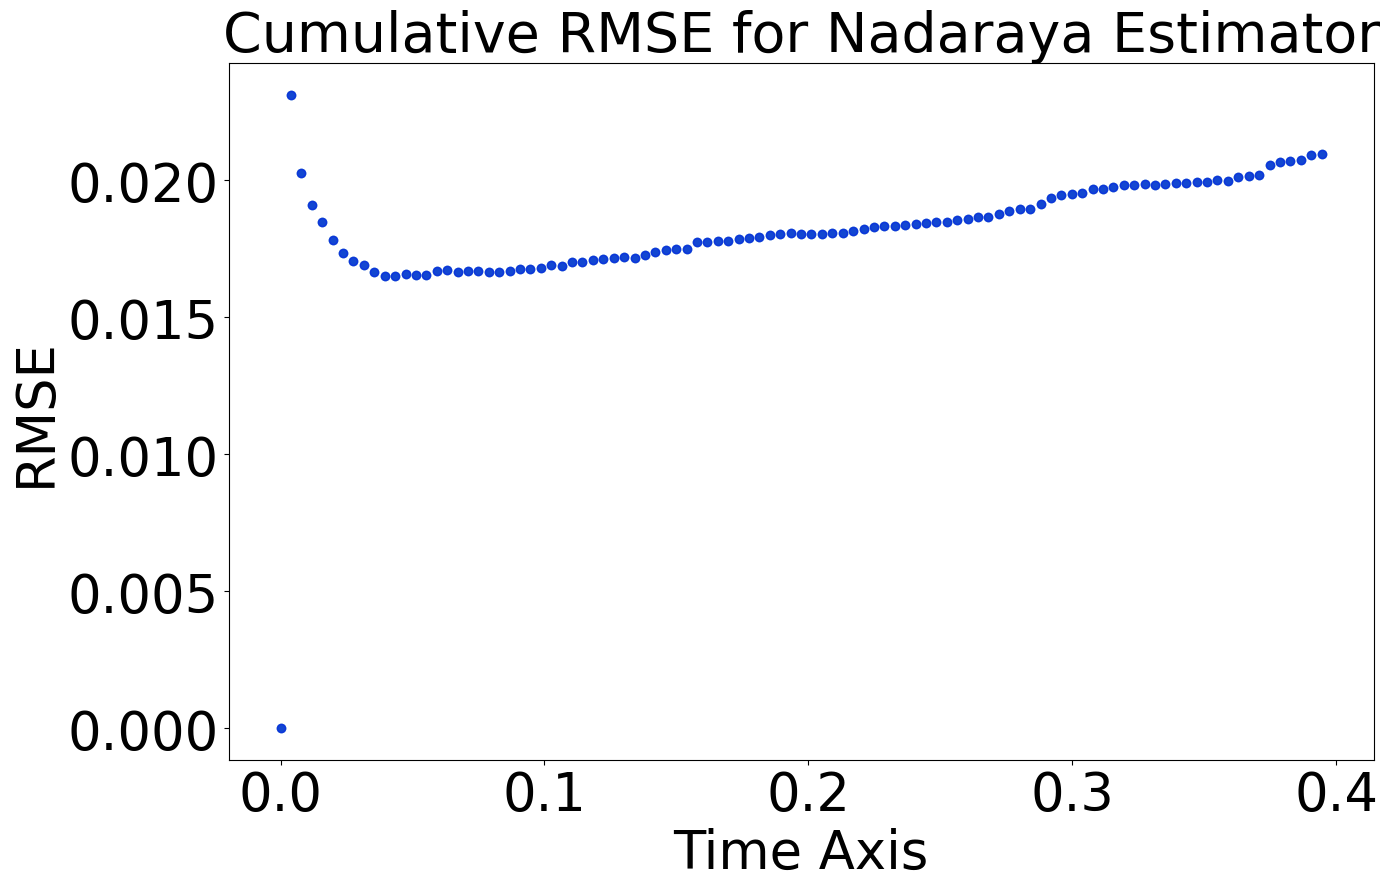

Final time cumulative RMSE local-time error 0.02097191204618581 with IQR (0.020971912046185804, 0.020971912046185804) at bw 5.12e-05

0.018588806101084373 (0.018588806101084373, 0.018588806101084373) 0.02097191204618581


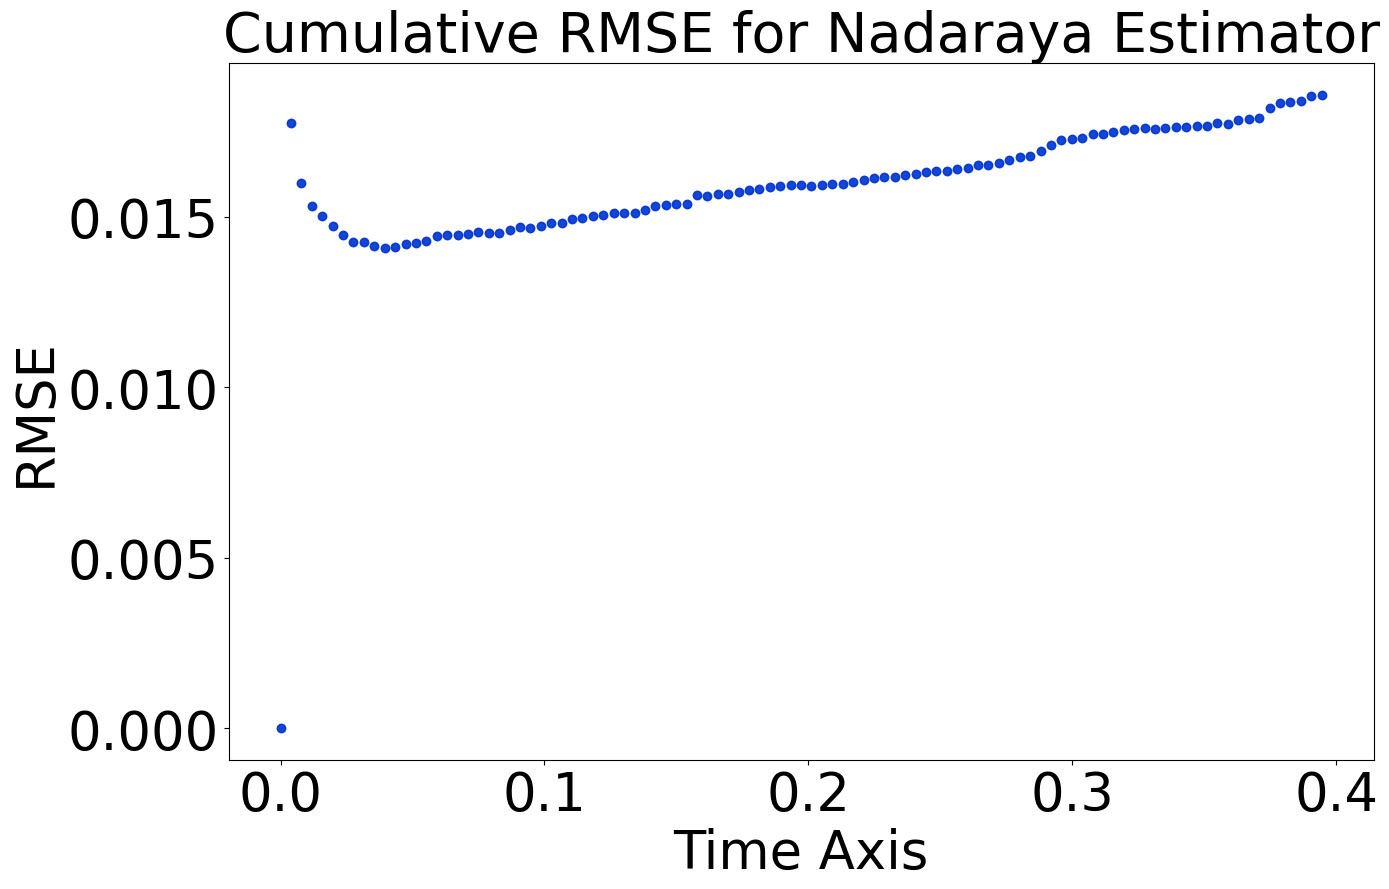

Final time cumulative RMSE local-time error 0.018588806101084373 with IQR (0.018588806101084373, 0.018588806101084373) at bw 6.46e-05

0.016438236930800855 (0.016438236930800855, 0.016438236930800855) 0.018588806101084373


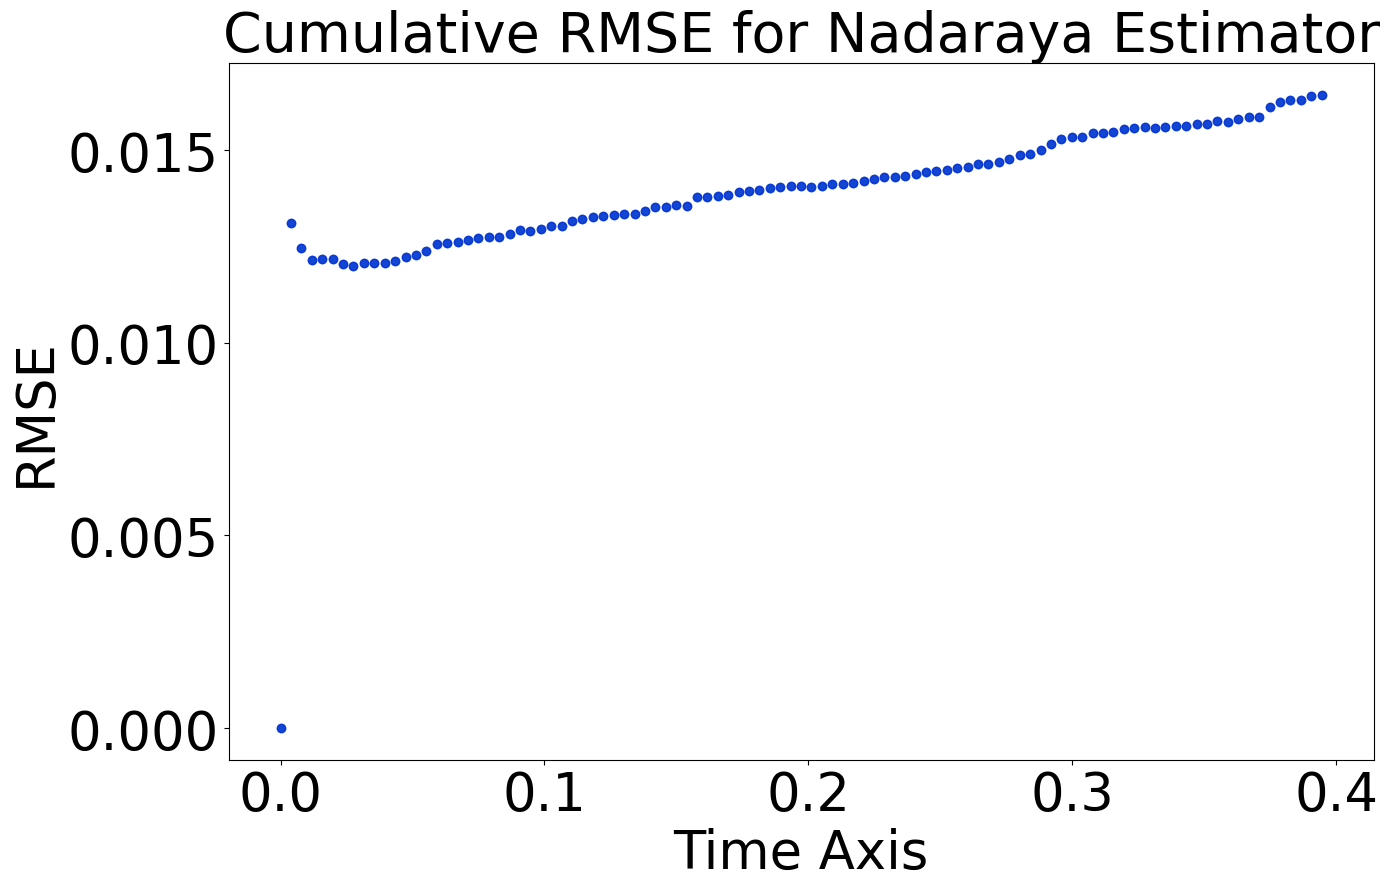

Final time cumulative RMSE local-time error 0.016438236930800855 with IQR (0.016438236930800855, 0.016438236930800855) at bw 8.16e-05

0.01454121014649599 (0.01454121014649599, 0.01454121014649599) 0.016438236930800855


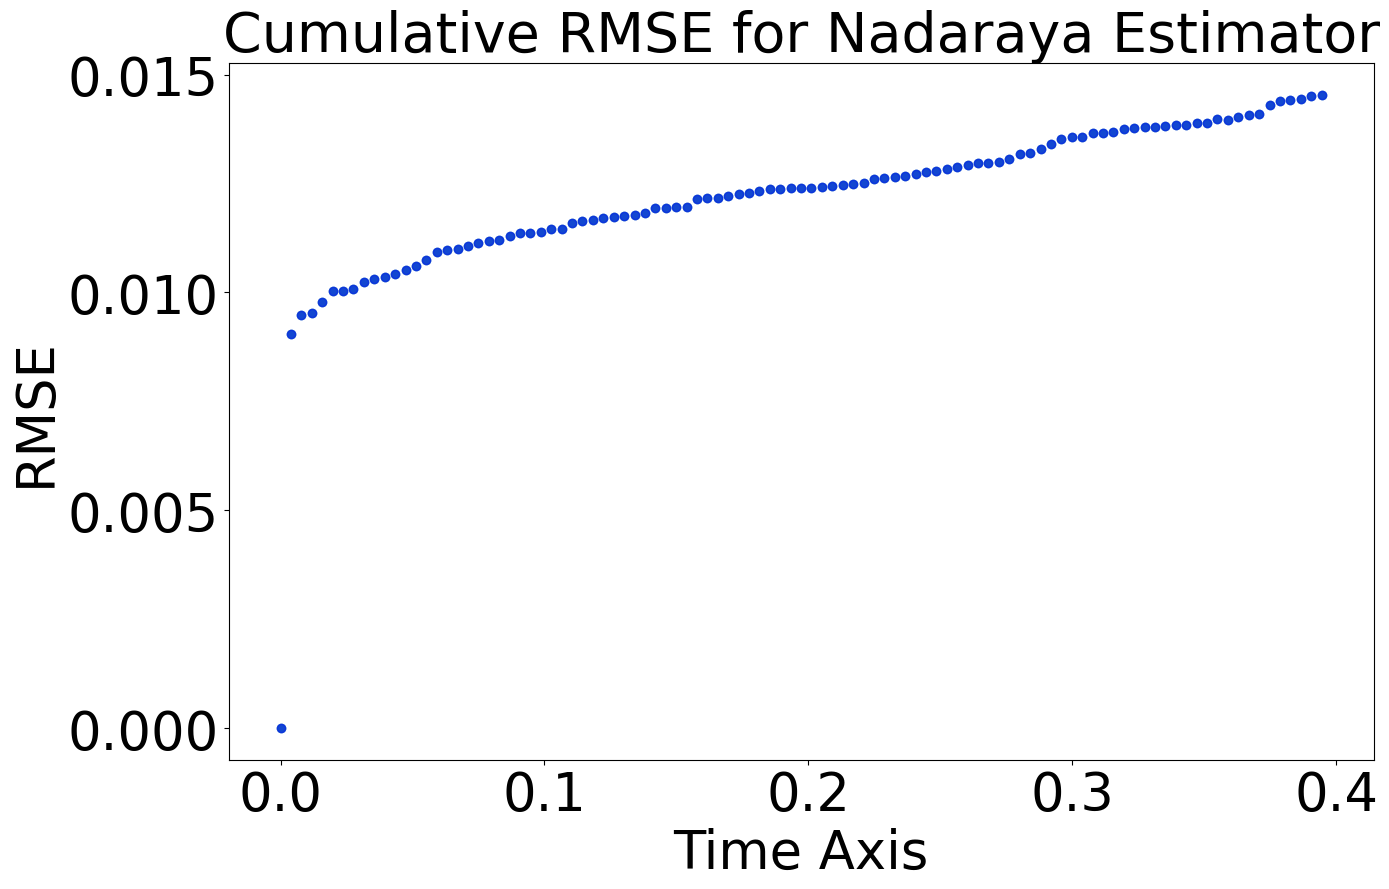

Final time cumulative RMSE local-time error 0.01454121014649599 with IQR (0.01454121014649599, 0.01454121014649599) at bw 0.000103

0.012905966049535872 (0.012905966049535875, 0.012905966049535875) 0.01454121014649599


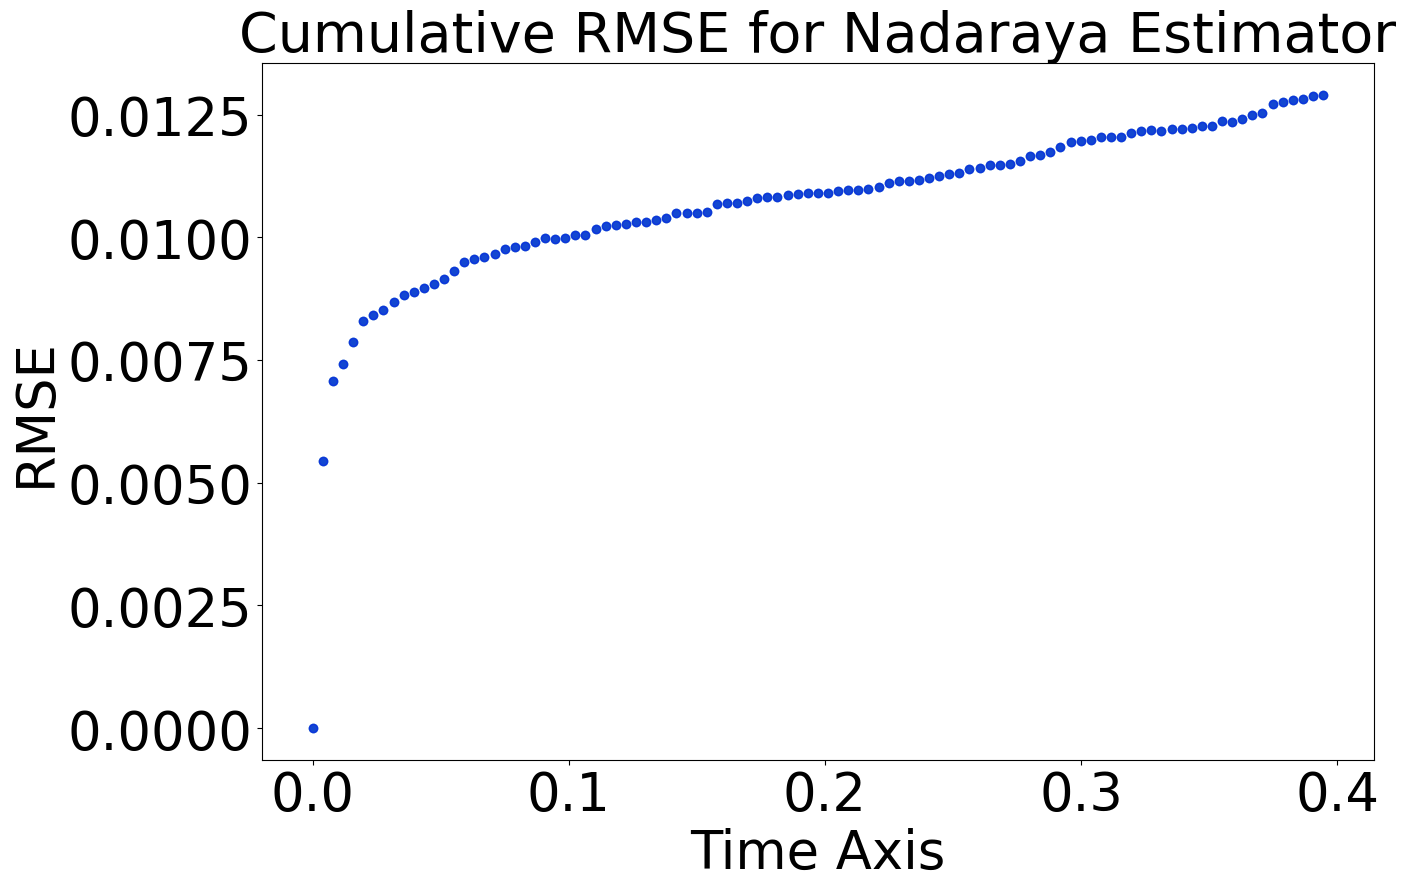

Final time cumulative RMSE local-time error 0.012905966049535872 with IQR (0.012905966049535875, 0.012905966049535875) at bw 0.00013

0.011480314738815476 (0.01148031473881548, 0.01148031473881548) 0.012905966049535872


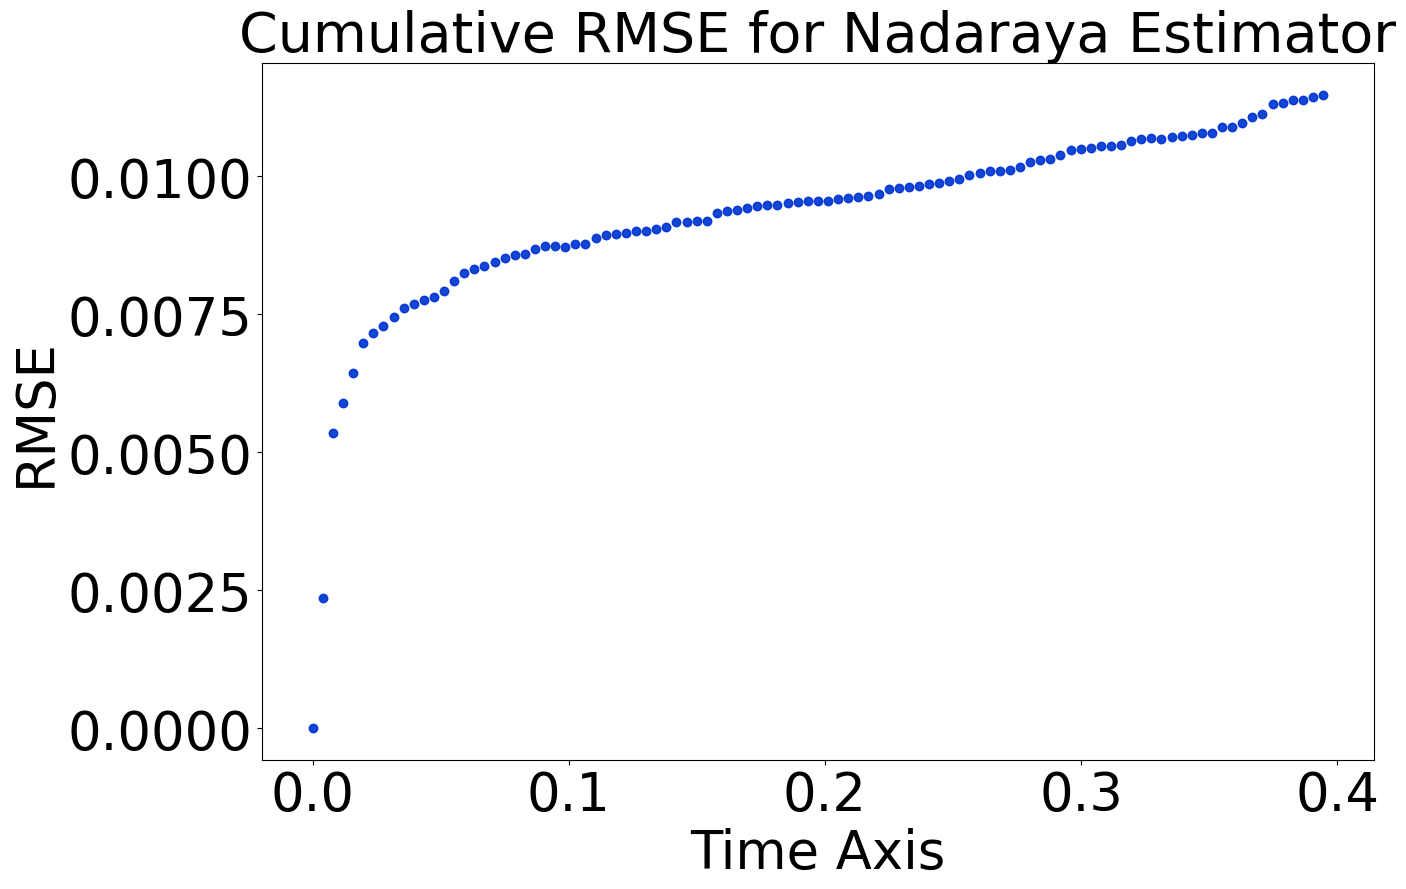

Final time cumulative RMSE local-time error 0.011480314738815476 with IQR (0.01148031473881548, 0.01148031473881548) at bw 0.0001642

0.010177220813503054 (0.01017722081350305, 0.01017722081350305) 0.011480314738815476


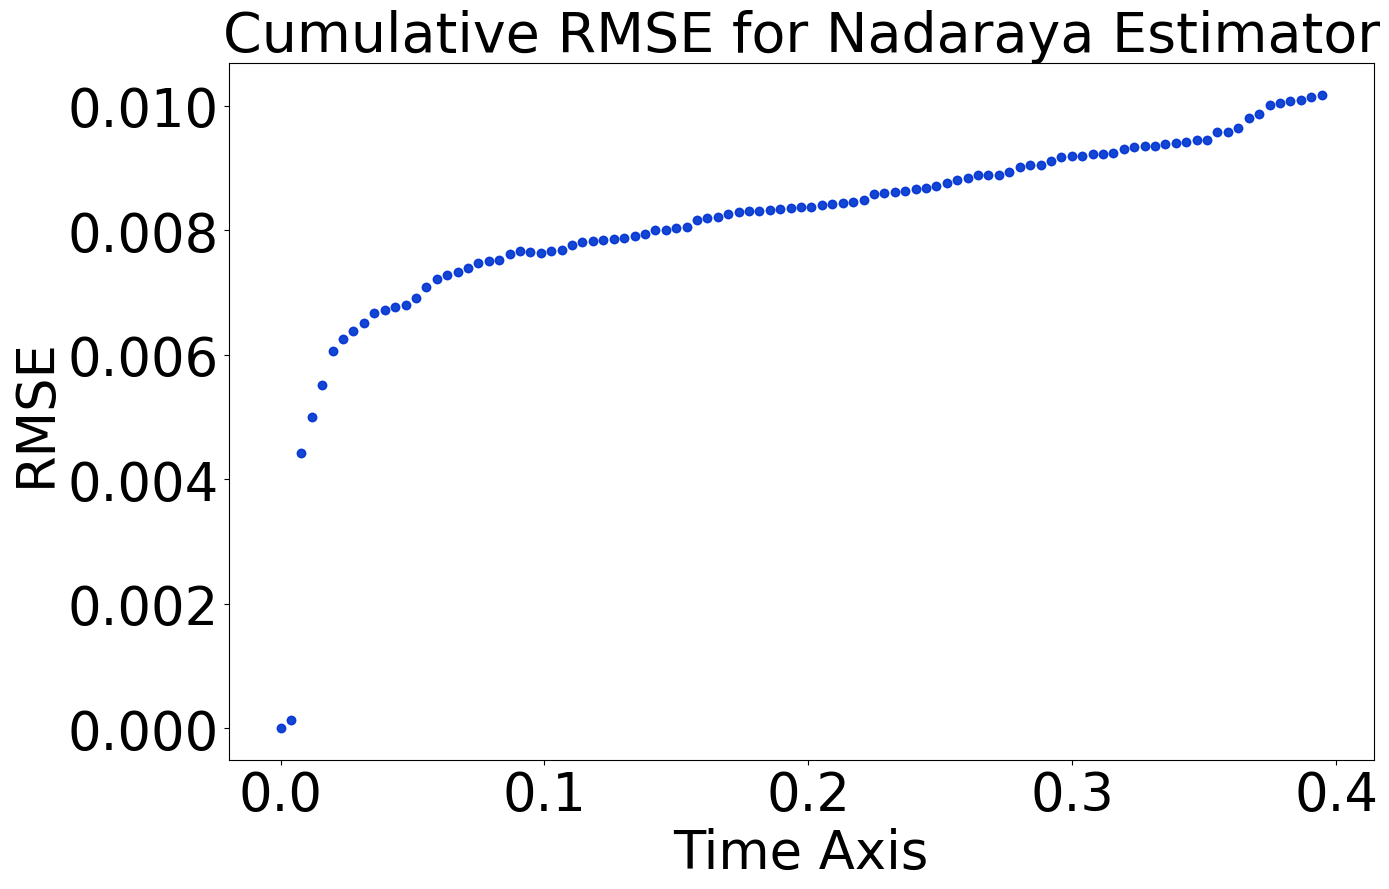

Final time cumulative RMSE local-time error 0.010177220813503054 with IQR (0.01017722081350305, 0.01017722081350305) at bw 0.0002073

0.008954549589628324 (0.008954549589628324, 0.008954549589628324) 0.010177220813503054


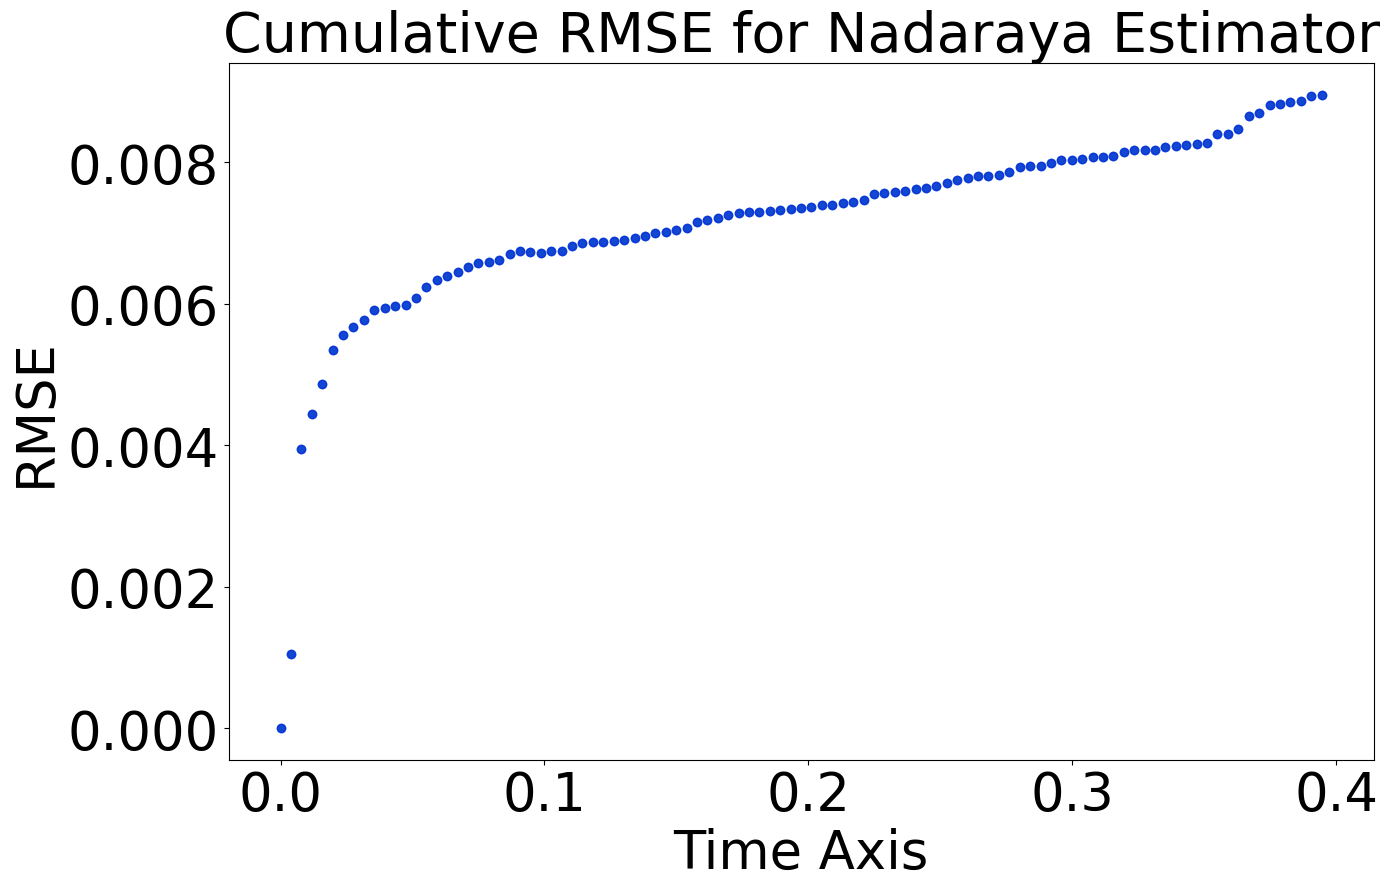

Final time cumulative RMSE local-time error 0.008954549589628324 with IQR (0.008954549589628324, 0.008954549589628324) at bw 0.0002618

0.007827297873534386 (0.007827297873534386, 0.007827297873534386) 0.008954549589628324


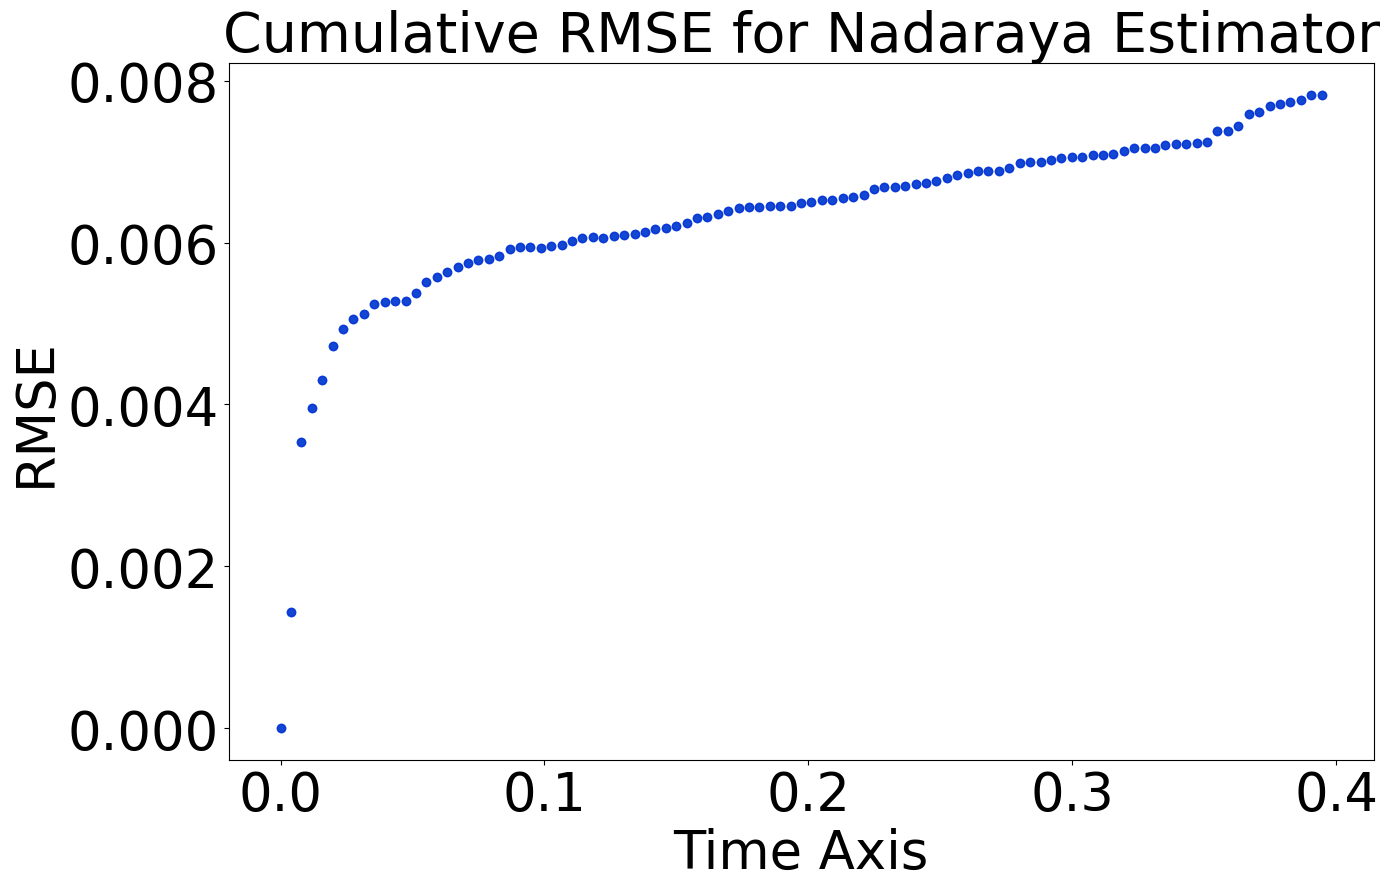

Final time cumulative RMSE local-time error 0.007827297873534386 with IQR (0.007827297873534386, 0.007827297873534386) at bw 0.0003305

0.006817802339446119 (0.0068178023394461175, 0.0068178023394461175) 0.007827297873534386


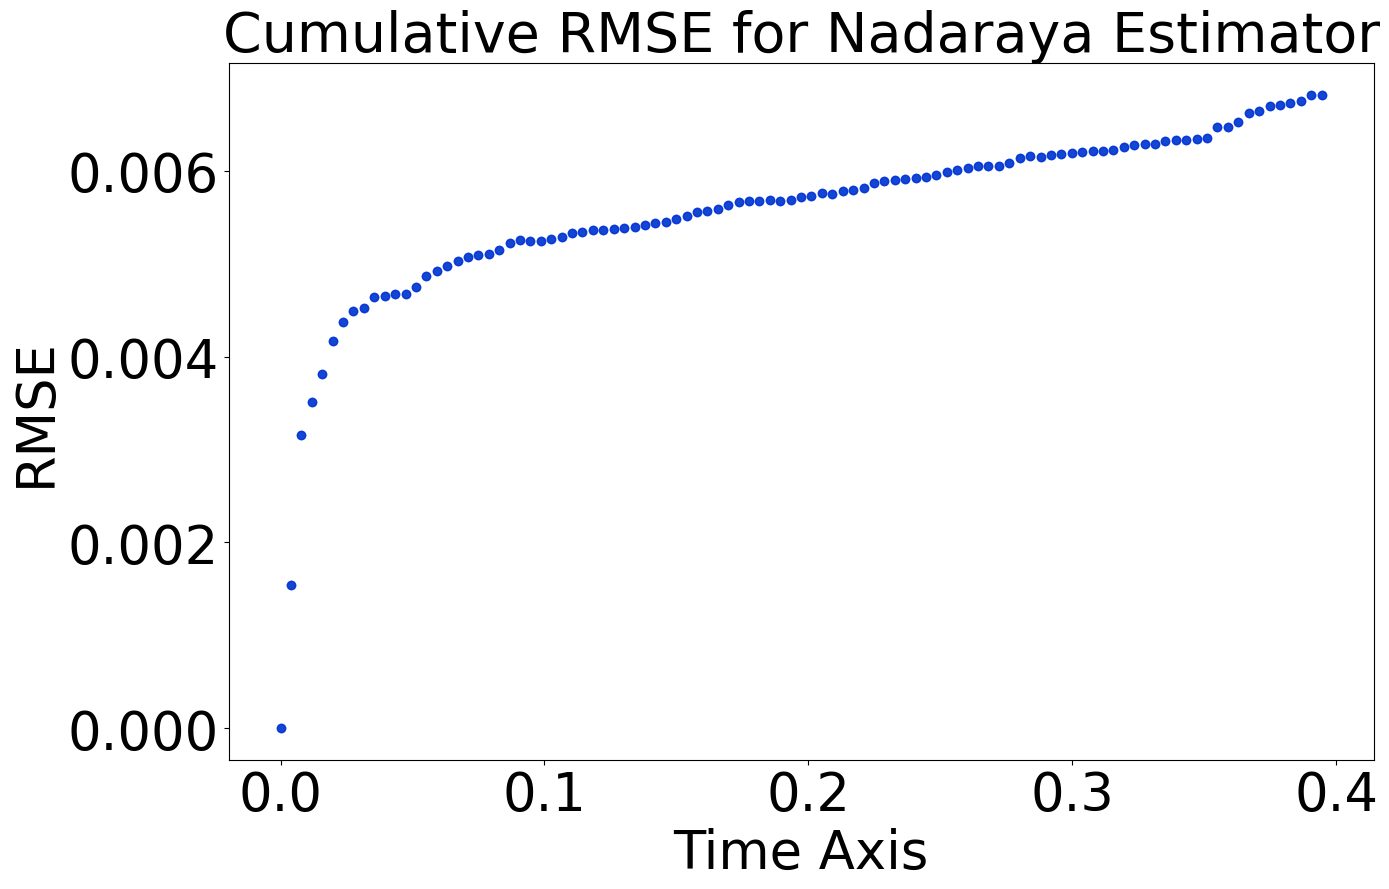

Final time cumulative RMSE local-time error 0.006817802339446119 with IQR (0.0068178023394461175, 0.0068178023394461175) at bw 0.0004174

0.005930107475914349 (0.0059301074759143466, 0.0059301074759143466) 0.006817802339446119


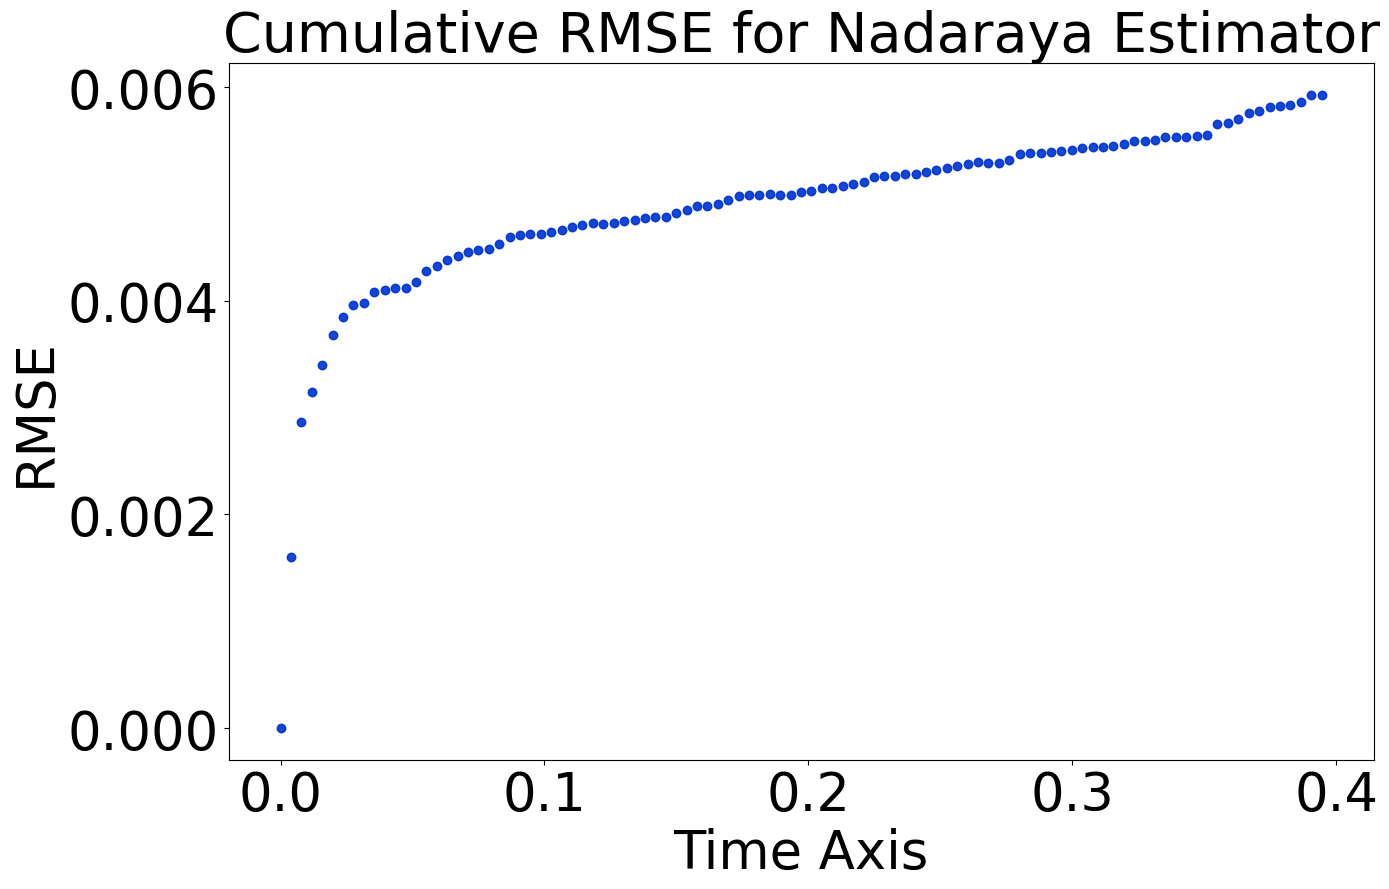

Final time cumulative RMSE local-time error 0.005930107475914349 with IQR (0.0059301074759143466, 0.0059301074759143466) at bw 0.000527

0.0051656856006374475 (0.005165685600637449, 0.005165685600637449) 0.005930107475914349


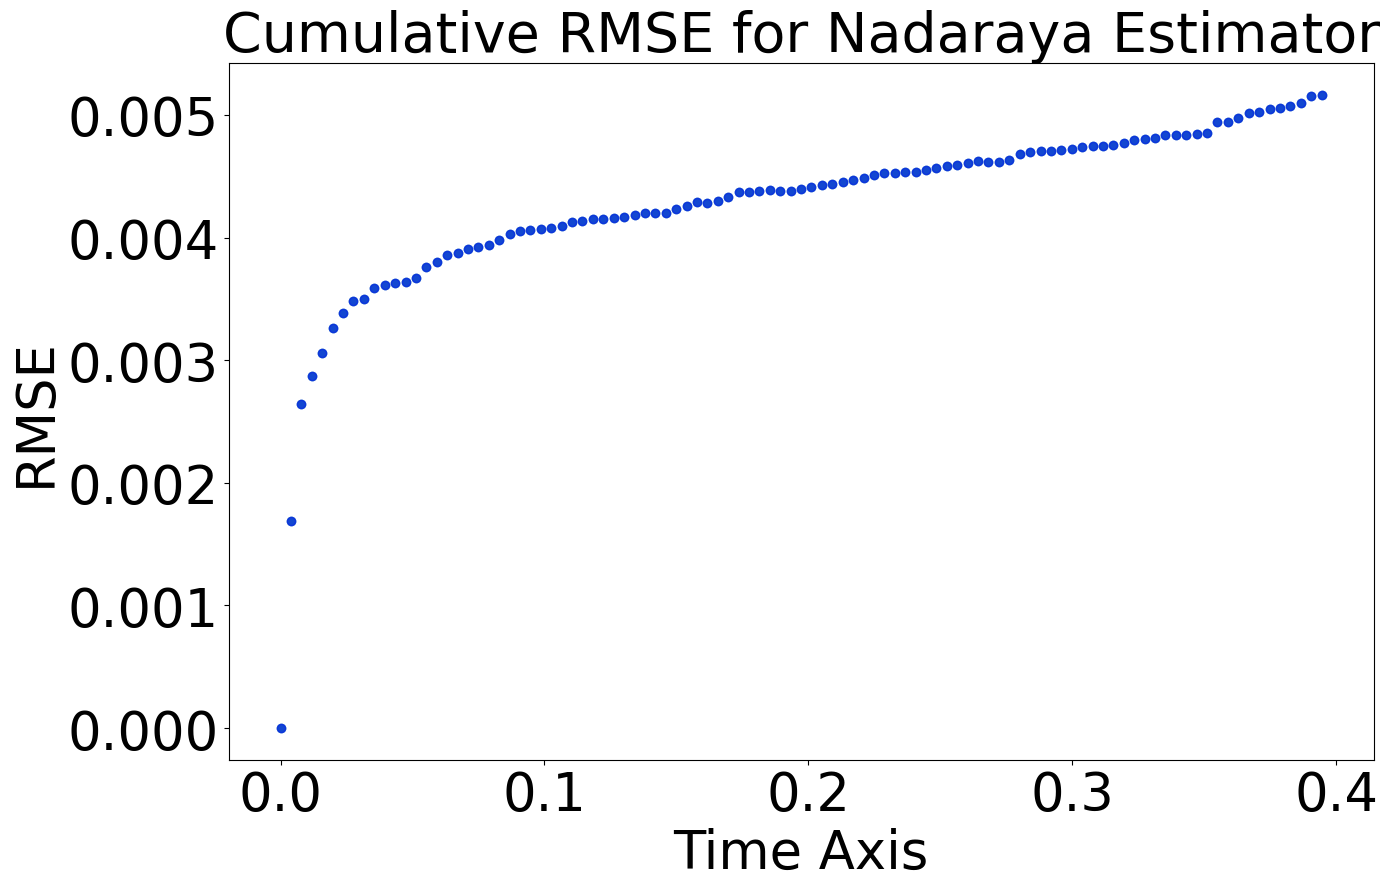

Final time cumulative RMSE local-time error 0.0051656856006374475 with IQR (0.005165685600637449, 0.005165685600637449) at bw 0.0006654

0.004541302921142689 (0.00454130292114269, 0.00454130292114269) 0.0051656856006374475


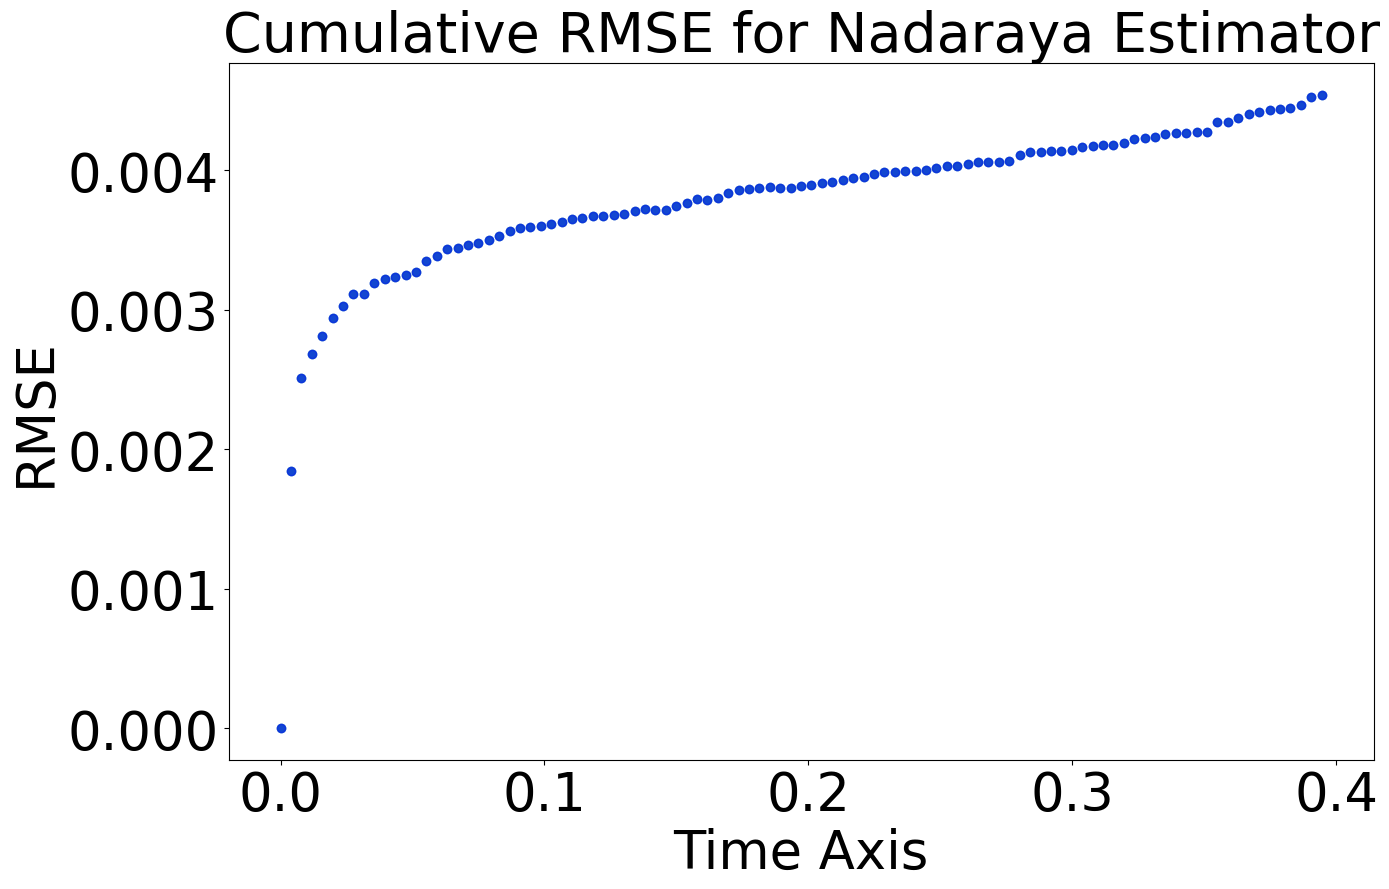

Final time cumulative RMSE local-time error 0.004541302921142689 with IQR (0.00454130292114269, 0.00454130292114269) at bw 0.0008402

0.0041162809612825795 (0.004116280961282579, 0.004116280961282579) 0.004541302921142689


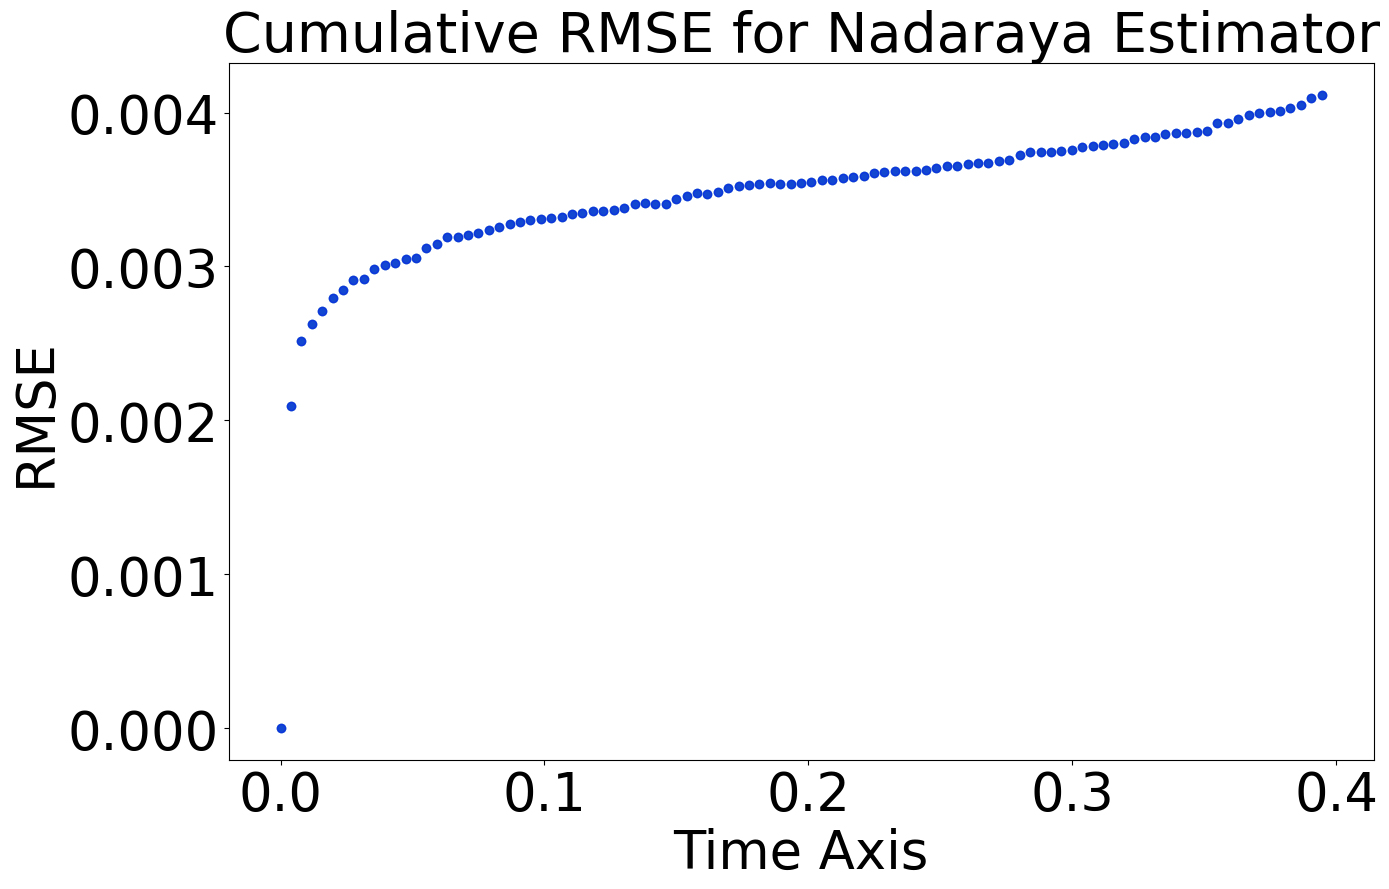

Final time cumulative RMSE local-time error 0.0041162809612825795 with IQR (0.004116280961282579, 0.004116280961282579) at bw 0.0010608

0.004054912584947861 (0.00405491258494786, 0.00405491258494786) 0.0041162809612825795


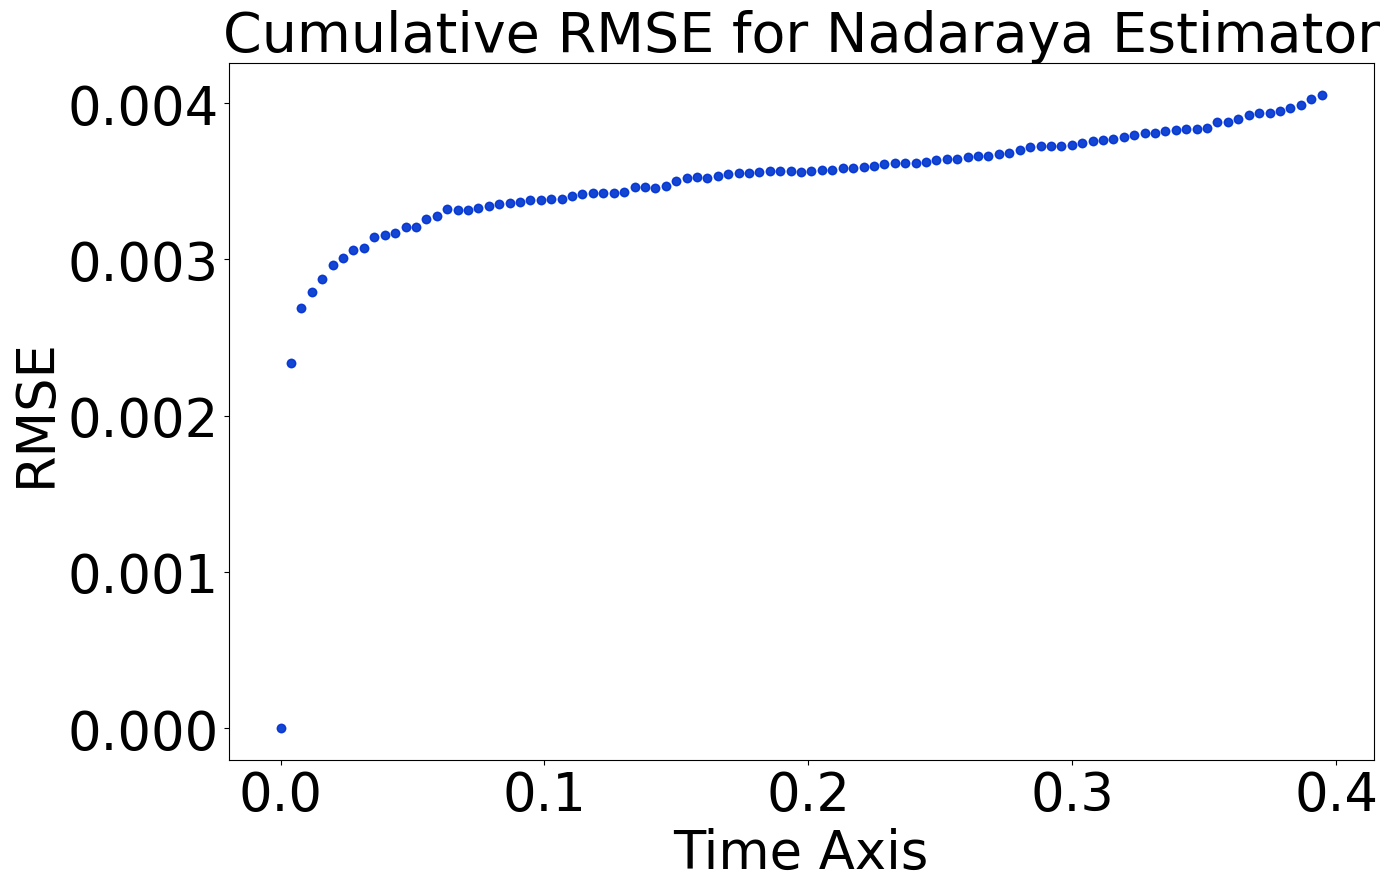

Final time cumulative RMSE local-time error 0.004054912584947861 with IQR (0.00405491258494786, 0.00405491258494786) at bw 0.0013394

0.004659950992176665 (0.004659950992176663, 0.004659950992176663) 0.004054912584947861
0.006251046325578461 (0.006251046325578458, 0.006251046325578458) 0.004054912584947861
0.009080956592969338 (0.009080956592969334, 0.009080956592969334) 0.004054912584947861
0.01336699879092396 (0.013366998790923963, 0.013366998790923963) 0.004054912584947861
0.01919818346693292 (0.019198183466932923, 0.019198183466932923) 0.004054912584947861
0.02627213602006246 (0.026272136020062464, 0.026272136020062464) 0.004054912584947861
0.033540508466950565 (0.03354050846695057, 0.03354050846695057) 0.004054912584947861
0.039365288483739116 (0.03936528848373912, 0.03936528848373912) 0.004054912584947861
0.04256254413277782 (0.0425625441327778, 0.0425625441327778) 0.004054912584947861
0.04357337738197134 (0.043573377381971354, 0.043573377381971354) 0.004054912584947861
0.0437494

In [37]:
best_rmse = np.inf
toSave = True
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])/np.sqrt(config.deltaT)
    all_local_states = np.load(file[1])/np.sqrt(config.deltaT)
    assert (len(all_true_states.shape) == len(all_local_states.shape) == 4)
    all_local_errors = np.cumsum(np.mean(np.power(all_true_states- all_local_states,2), axis=(1,3)), axis=-1)/np.arange(1, all_local_states.shape[2]+1)
    total_local_errors = np.mean(np.sqrt(all_local_errors), axis=0)
    total_local_errors_minq = np.quantile(np.sqrt(all_local_errors), axis=0,q=0.025)
    total_local_errors_maxq = np.quantile(np.sqrt(all_local_errors), axis=0,q=0.975)
    print(total_local_errors[-1], (total_local_errors_minq[-1], total_local_errors_maxq[-1]), best_rmse)
    if total_local_errors[-1] < best_rmse:
        miny = total_local_errors-total_local_errors_minq
        miny[miny < 0.] = 0.
        maxy = total_local_errors_maxq-total_local_errors
        maxy[maxy < 0.] = 0.
        time_steps = np.linspace(config.t0,config.deltaT*total_local_errors.shape[0],total_local_errors.shape[0])
        best_rmse = total_local_errors[-1]
        fig, ax = plt.subplots(figsize=(14,9))
        ax.scatter(np.linspace(config.t0,config.deltaT*total_local_errors.shape[0],total_local_errors.shape[0]), total_local_errors)
        plt.errorbar(time_steps,total_local_errors,yerr=[miny, maxy],xerr=None, fmt='o', color="blue", alpha=0.4)
        ax.set_title(f"Cumulative RMSE for Nadaraya Estimator", fontsize=40)
        ax.set_ylabel("RMSE", fontsize=38)
        ax.set_xlabel("Time Axis", fontsize=38)
        ax.tick_params(labelsize=38)
        plt.tight_layout()
        if toSave:
            save_path = f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/"
            plt.savefig(save_path + (f"IIDNadaraya_DriftTrack_f{ts_type}2_{round(bw,6)}bw").replace(".", "")+".png",  bbox_inches='tight')
        plt.show()
        plt.close()
        print(f"Final time cumulative RMSE local-time error {total_local_errors[-1]} with IQR {(total_local_errors_minq[-1], total_local_errors_maxq[-1])} at bw {bw}\n")
